Name: Jagadish

# LOAN DEFAULT PREDICTION

• Build a Random Forest model with the dataset provided in the shared drive. You are free to do any kind of EDA (using all statistical tools and methodology taught in session) as per your choice and play around with the data. Following are the must have things for submission of project :

            ○ Proper EDA with explanation of impactful and useful variables
            ○ Graphs wherever necessary
            ○ Metrics for model evaluation:
                               • Confusion Matrix
                               • Accuracy Score
                               • F1 score, Precision, Recall, ROC-AUC 
                               • Model Optimization using K fold cross validation

Also ensure that you use Train file for Training the model and Test file for testing the mode 

• Consider column B (Risk_flag) as the target (y) variable and rest of the columns as feature variables.


##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Importing Dataset

In [2]:
train_data = pd.read_csv('Train.csv')

# view of dataset
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [3]:
# Basic Information of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
# Statistical Summary
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


### Data Preprocessing

<AxesSubplot:>

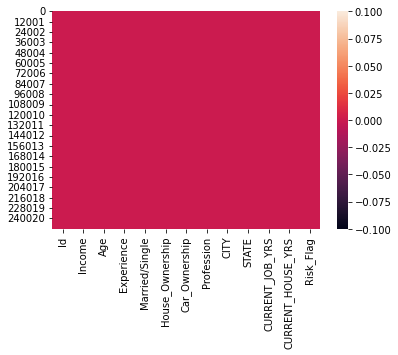

In [5]:
sns.heatmap(train_data.isnull())

In [6]:
train_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Insight : There is no missing values.

## Exploratory Data Analysis

### Which Indian state has more and less loans? 

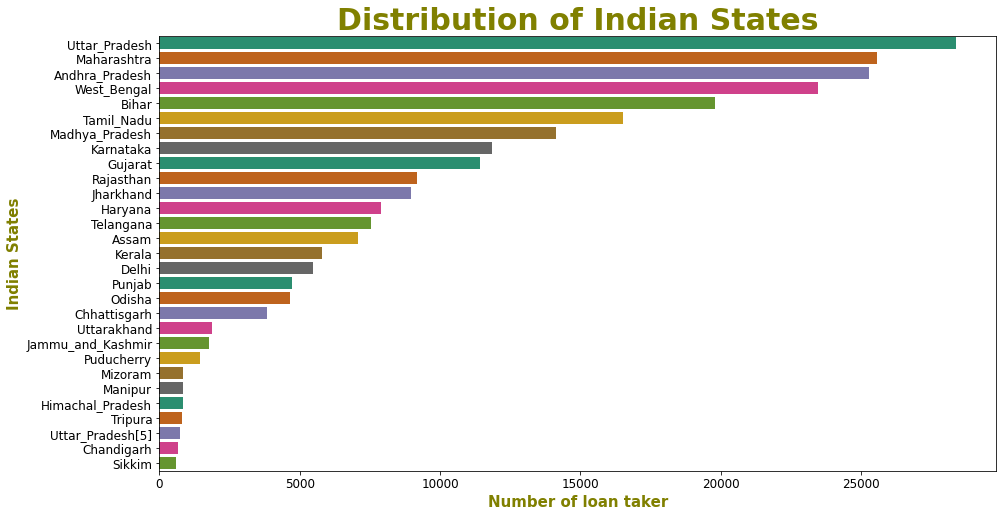


 ----------State wise number of loan taker---------- 

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [7]:
# Making barchart to see distribution of indian states
state = train_data["STATE"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(state.values, state.index, palette='Dark2')
plt.title('Distribution of Indian States', fontsize=30, fontweight='bold', color='olive')
plt.xlabel('Number of loan taker', fontsize=15, fontweight='bold', color='olive')
plt.ylabel('Indian States', fontsize=15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.show()

print('\n ----------State wise number of loan taker---------- \n')
print(train_data['STATE'].value_counts())

##### Insight:
            • Uttar Pradesh has highest number of loan taker, That is 28400.
            • Maharashtra has second highest number of loan taker, That is 25562.
            • Andhra Pradesh third highest number of loan taker, That is 25297.
            
         And
            • Sikkim has lowest number of loan taker, That is 608.
            • Chandigarh has second lowest number of loan taker, That is 656.

### Which Indian city has more and less loans?

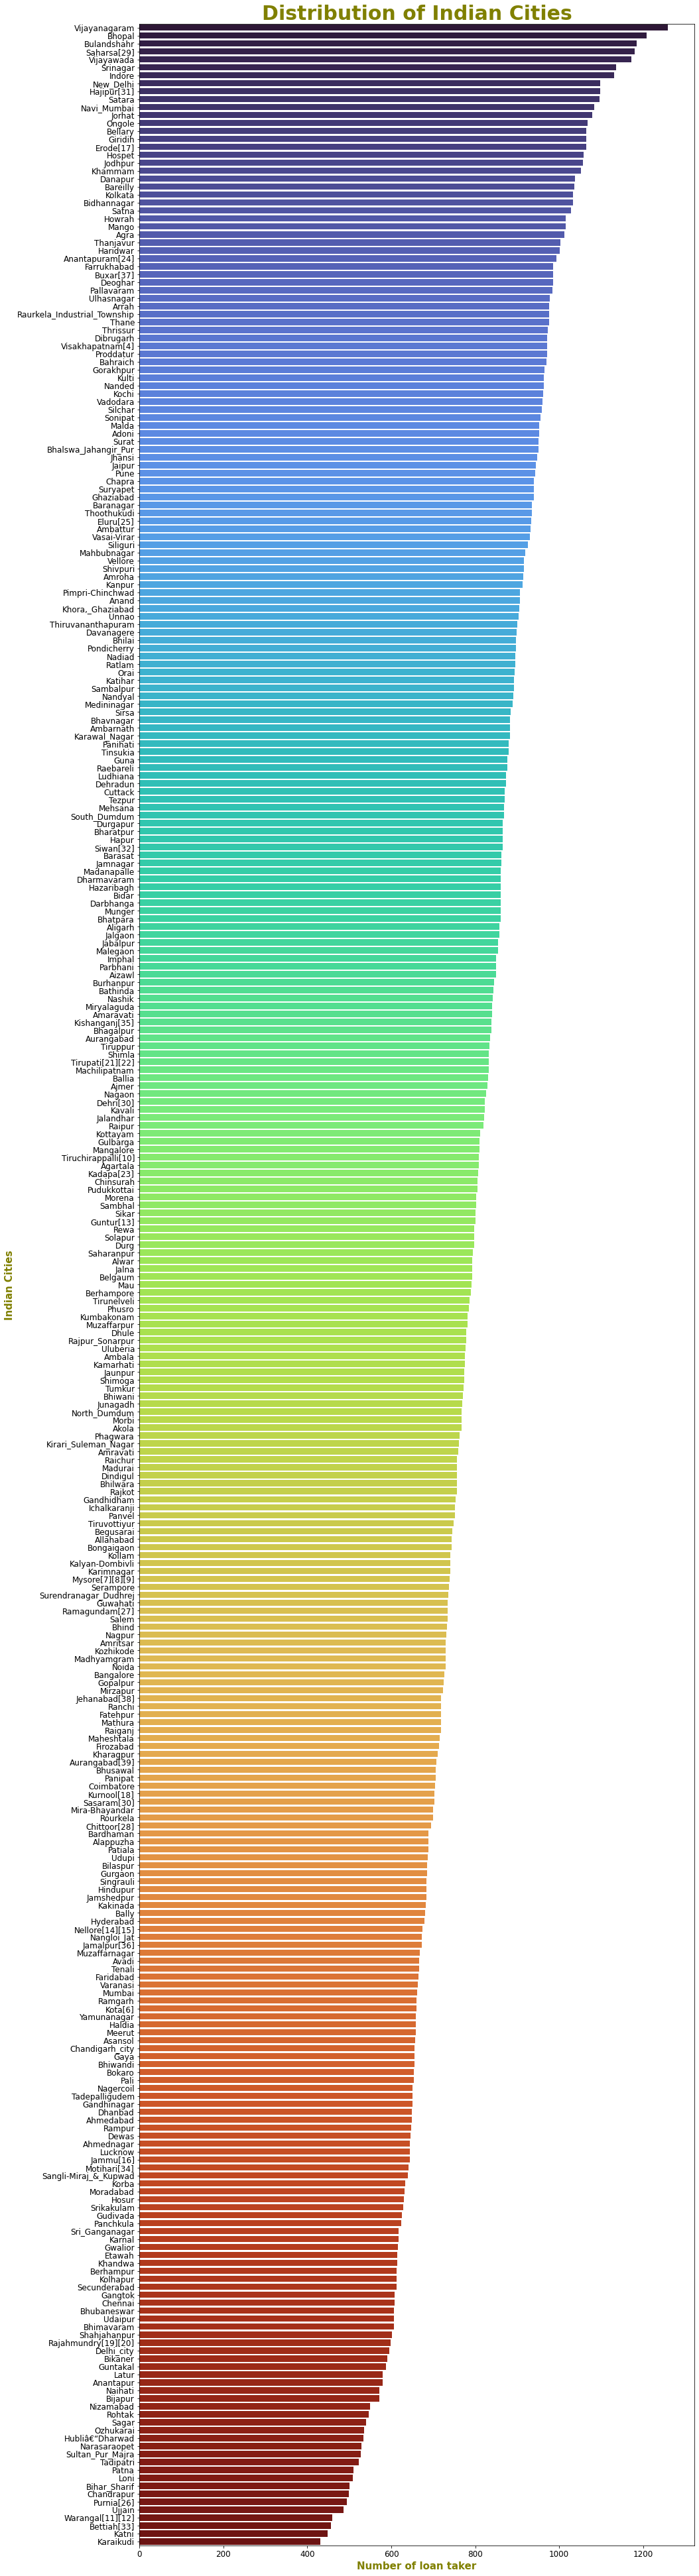


 ----------City wise number of loan taker---------- 

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64


In [8]:
# Making barchart to see distribution of indian cities
city = train_data["CITY"].value_counts()

plt.figure(figsize=(15, 70))
sns.barplot(city.values, city.index, palette='turbo')
plt.title('Distribution of Indian Cities', fontsize=30, fontweight='bold', color='olive')
plt.xlabel('Number of loan taker', fontsize=15, fontweight='bold', color='olive')
plt.ylabel('Indian Cities', fontsize=15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.show()

print('\n ----------City wise number of loan taker---------- \n')
print(train_data['CITY'].value_counts())

##### Insight:
            • Vijayanagaram has highest number of loan taker, That is 1259.
            • Bhopal has second highest number of loan taker, That is 1208.
            • Bulandshahr third highest number of loan taker, That is 1185.
            
         And
            • Karaikudi has lowest number of loan taker, That is 431.
            • Katni has second lowest number of loan taker, That is 448.

### Which professional has more and less loans?

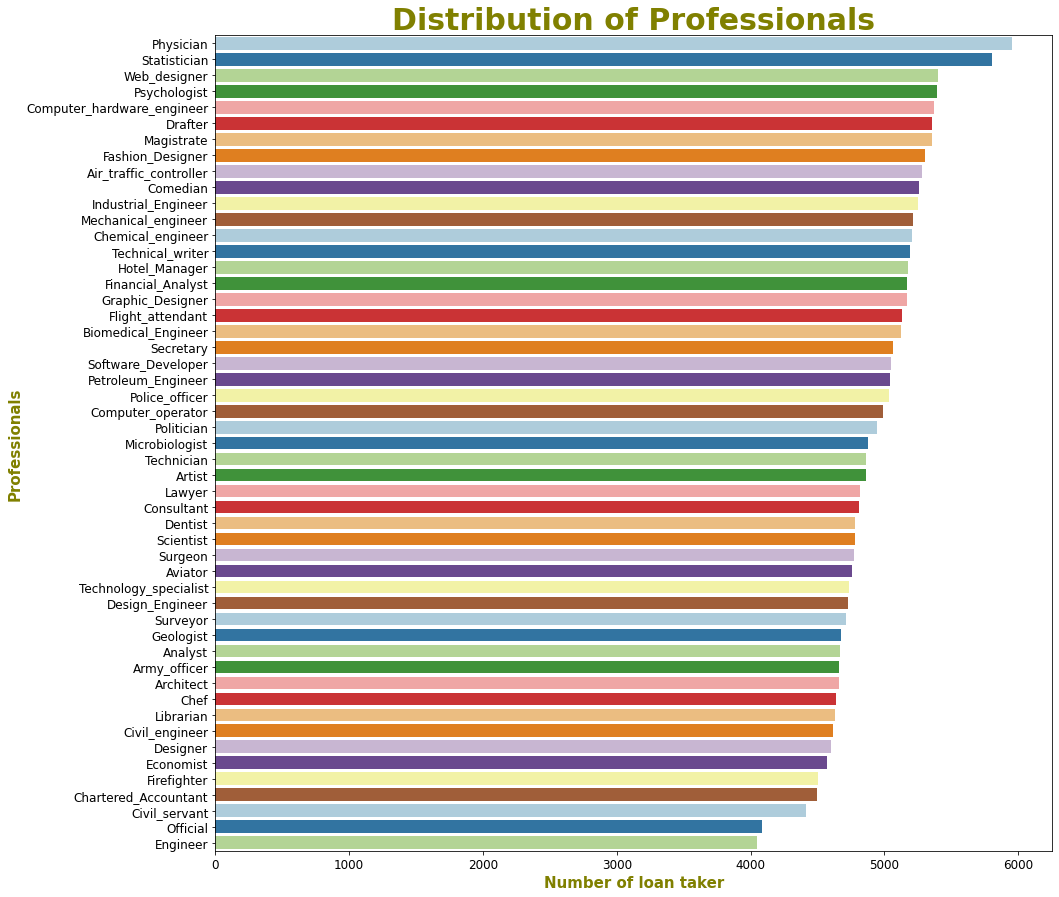


 ----------Professional wise number of loan taker---------- 

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                 

In [9]:
# Making barchart to see distribution of professionals
professionals = train_data["Profession"].value_counts()

plt.figure(figsize=(15, 15))
sns.barplot(professionals.values, professionals.index, palette='Paired')
plt.title('Distribution of Professionals', fontsize=30, fontweight='bold', color='olive')
plt.xlabel('Number of loan taker', fontsize=15, fontweight='bold', color='olive')
plt.ylabel('Professionals', fontsize=15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.show()

print('\n ----------Professional wise number of loan taker---------- \n')
print(train_data['Profession'].value_counts())

##### Insight:
            • Physician has highest number of loan taker, That is 5957.
            • Statistician has second highest number of loan taker, That is 5806.
            • Web Designer third highest number of loan taker, That is 5397.
            
         And
            • Engineer has lowest number of loan taker, That is 4048.
            • Official has second lowest number of loan taker, That is 4087.
            • Civil Servant third lowest number of loan taker, That is 4413.

### Checking Distribution of "Age"

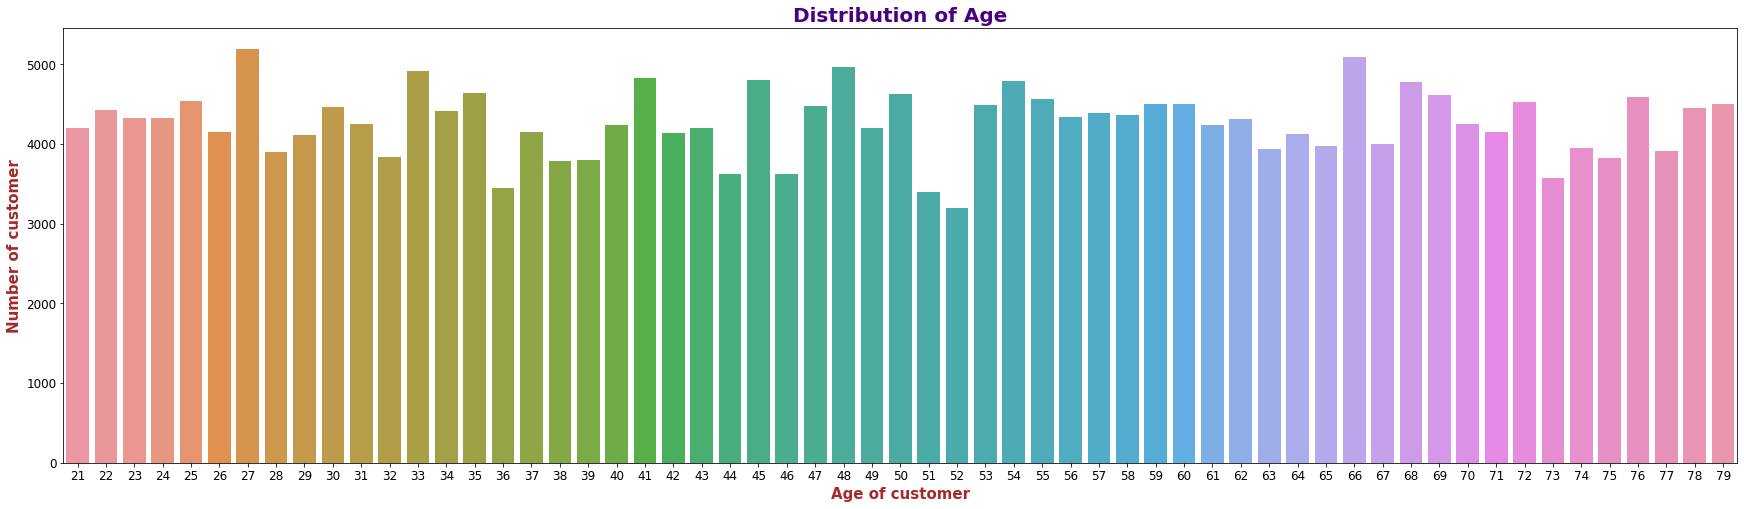


 --Value Counts-- 

27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916
28    3901
32    3834
75    3829
39    3800
38    3793
46    3627
44    3622
73    3569
36    3444
51    3397
52    3197
Name: Age, dtype: int64


In [10]:
age = train_data['Age'].value_counts()

plt.figure(figsize=(30,8))
sns.barplot(age.index, age.values)
plt.title('Distribution of Age', fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Age of customer", fontsize = 15, fontweight='bold', color='brown')
plt.ylabel('Number of customer', fontsize = 15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)

plt.show()

print('\n --Value Counts-- \n')
print(train_data['Age'].value_counts())

### Checking risk flag according to "Age"

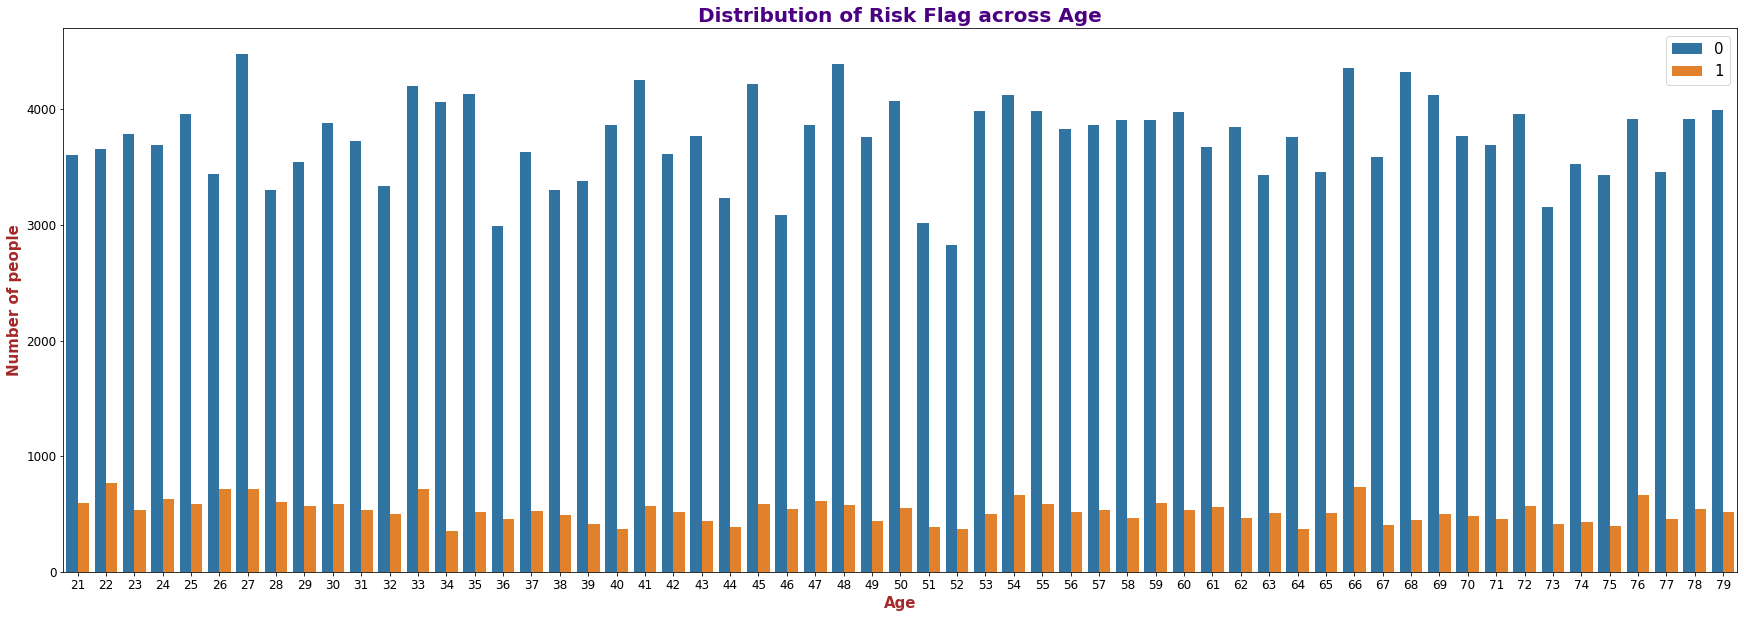

In [11]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Age' , data=train_data, hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Age', fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel('Age', fontsize = 15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize = 15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

### Checking risk flag according to "Experience"

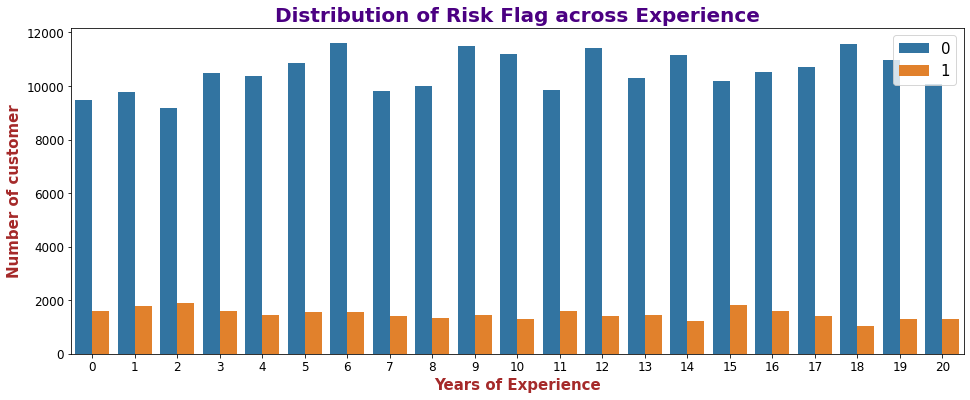


 --Value Counts-- 

6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: Experience, dtype: int64


In [12]:
plt.figure(figsize=(16, 6))

sns.countplot(x='Experience' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Experience", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Years of Experience", fontsize = 15, fontweight='bold', color='brown')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print("\n --Value Counts-- \n")
print(train_data['Experience'].value_counts())

### Checking risk flag according to "Married/Single"

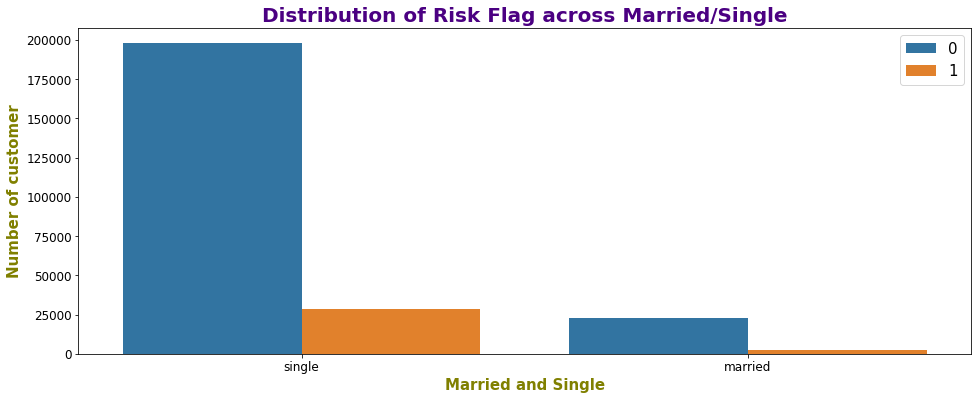


 --Value Counts-- 

single     226272
married     25728
Name: Married/Single, dtype: int64


In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Married/Single' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Married/Single", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Married and Single", fontsize = 15, fontweight='bold', color='olive')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print('\n --Value Counts-- \n')
print(train_data['Married/Single'].value_counts())

### Checking risk flag according to "House Ownership"

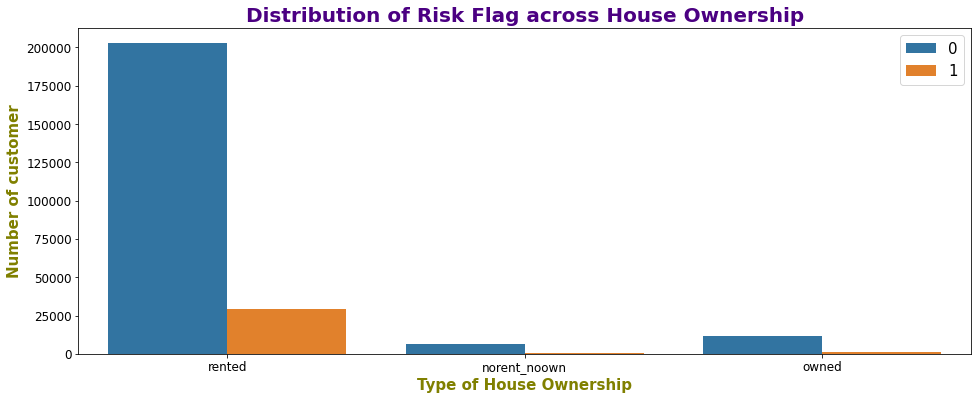


 --Value Counts-- 

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


In [14]:
plt.figure(figsize=(16, 6))

sns.countplot(x="House_Ownership" , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across House Ownership", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Type of House Ownership", fontsize = 15, fontweight='bold', color='olive')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print('\n --Value Counts-- \n')
print(train_data['House_Ownership'].value_counts())

### Checking risk flag according to "Car Ownership"

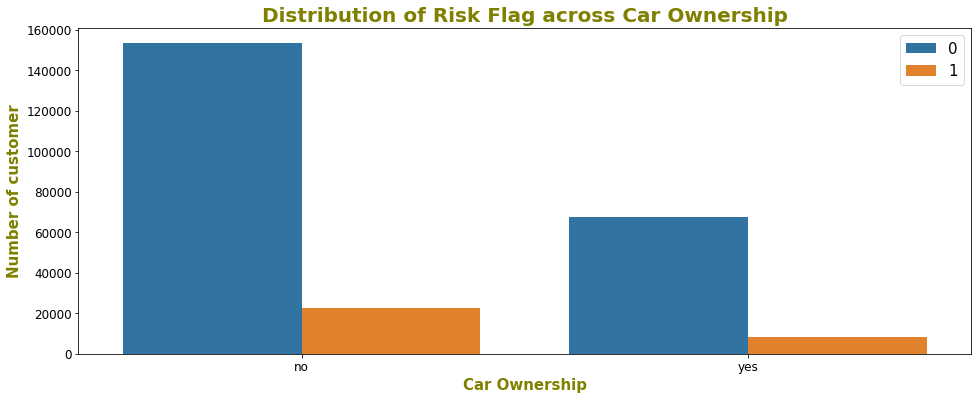


 --Value Counts-- 

no     176000
yes     76000
Name: Car_Ownership, dtype: int64


In [15]:
plt.figure(figsize=(16, 6))

sns.countplot(x='Car_Ownership' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Car Ownership", fontsize = 20, fontweight='bold', color='olive')
plt.xlabel("Car Ownership", fontsize = 15, fontweight='bold', color='olive')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print('\n --Value Counts-- \n')
print(train_data['Car_Ownership'].value_counts())

### Checking risk flag according to "Profession"

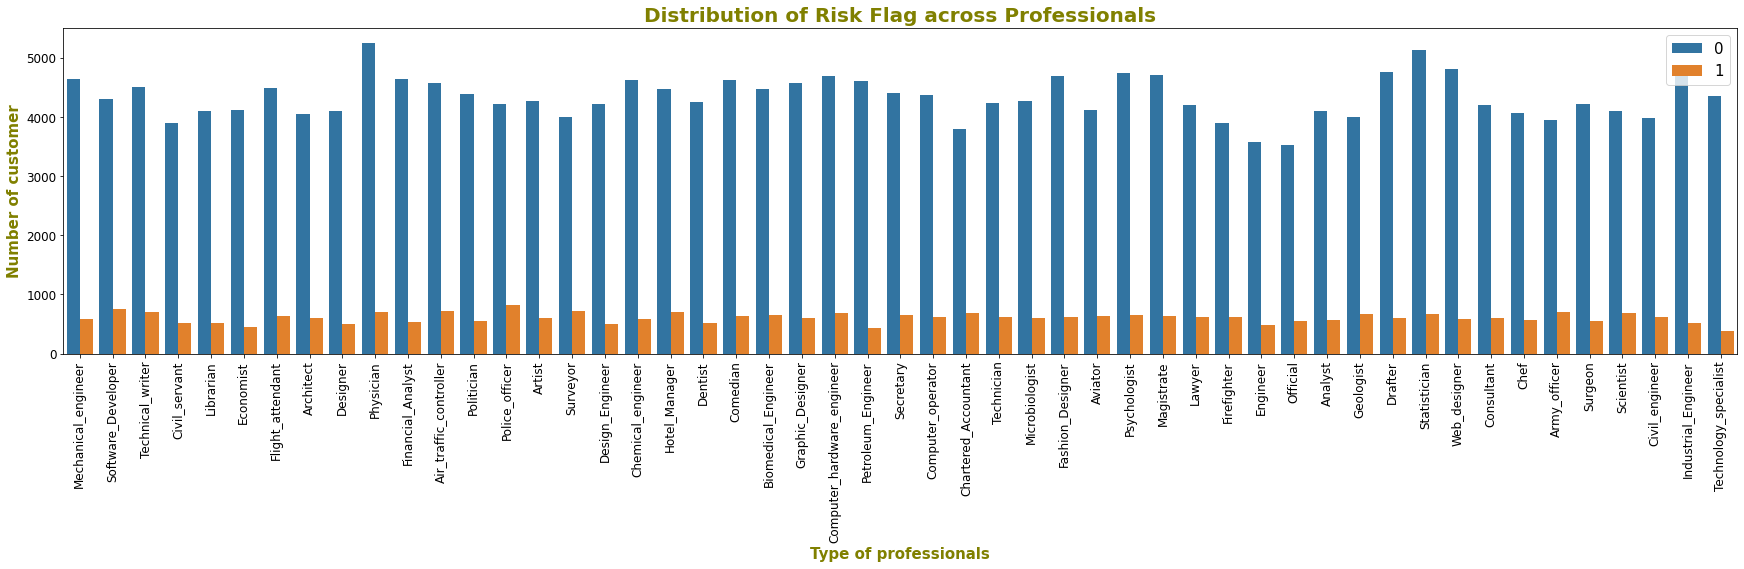

In [16]:
plt.figure(figsize=(30, 6))

sns.countplot(x='Profession' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Professionals", fontsize = 20, fontweight='bold', color='olive')
plt.xlabel("Type of professionals", fontsize = 15, fontweight='bold', color='olive')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='olive')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=90)

plt.show()

### Checking risk flag according to "CITY"

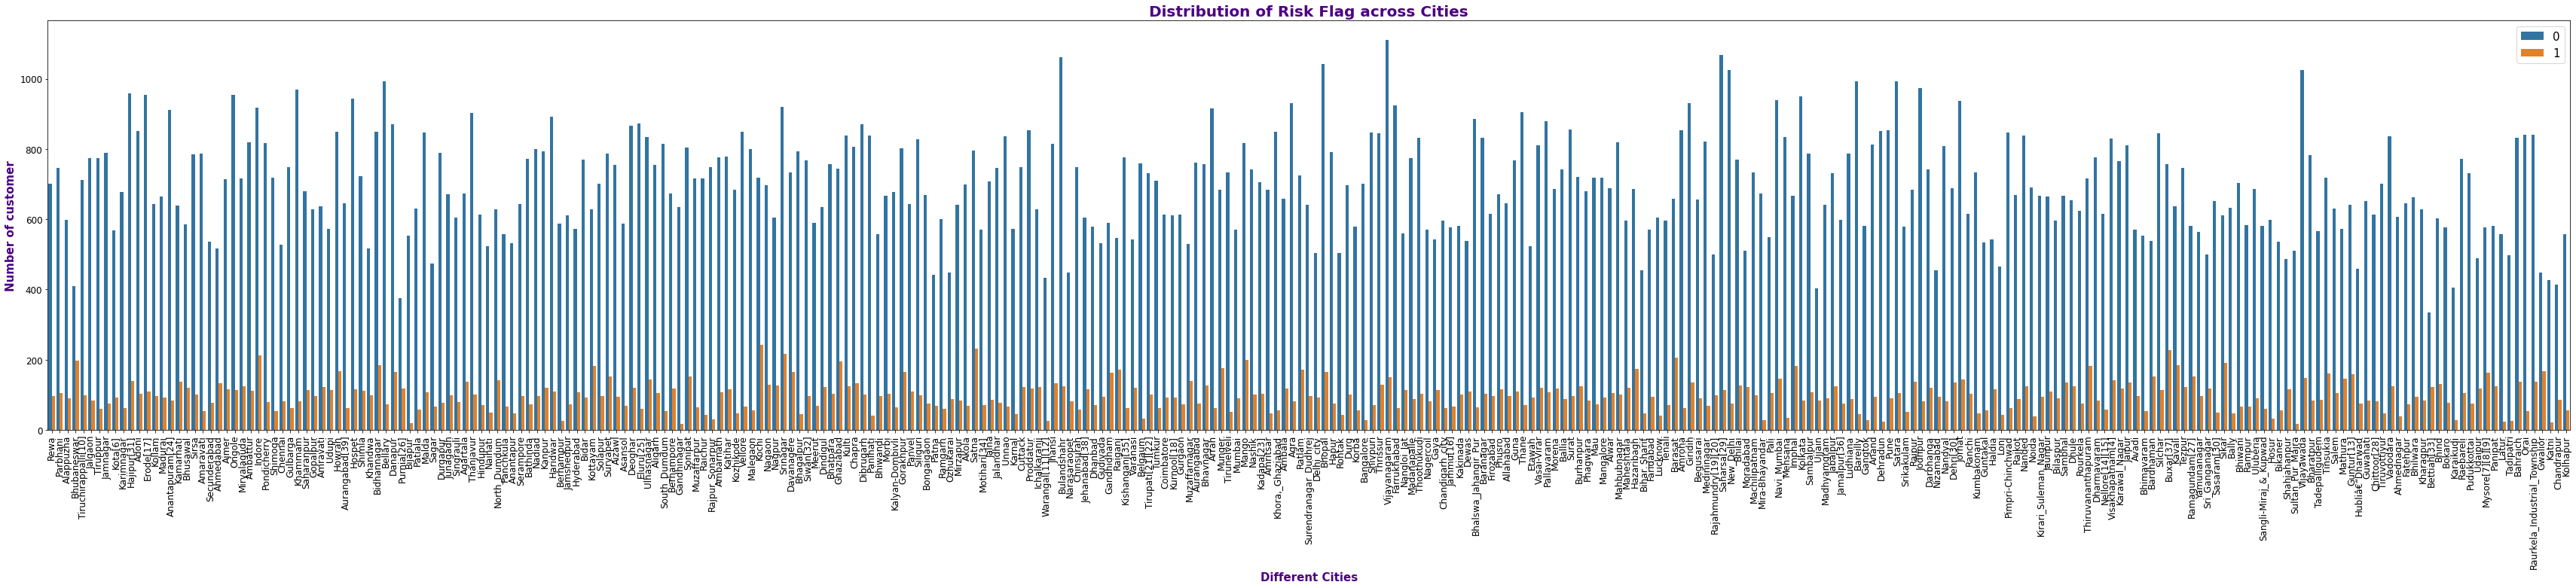

In [17]:
plt.figure(figsize=(60, 10))

sns.countplot(x='CITY' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Cities", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Different Cities", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='indigo')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=90)

plt.show()

### Checking risk flag according to "STATE"

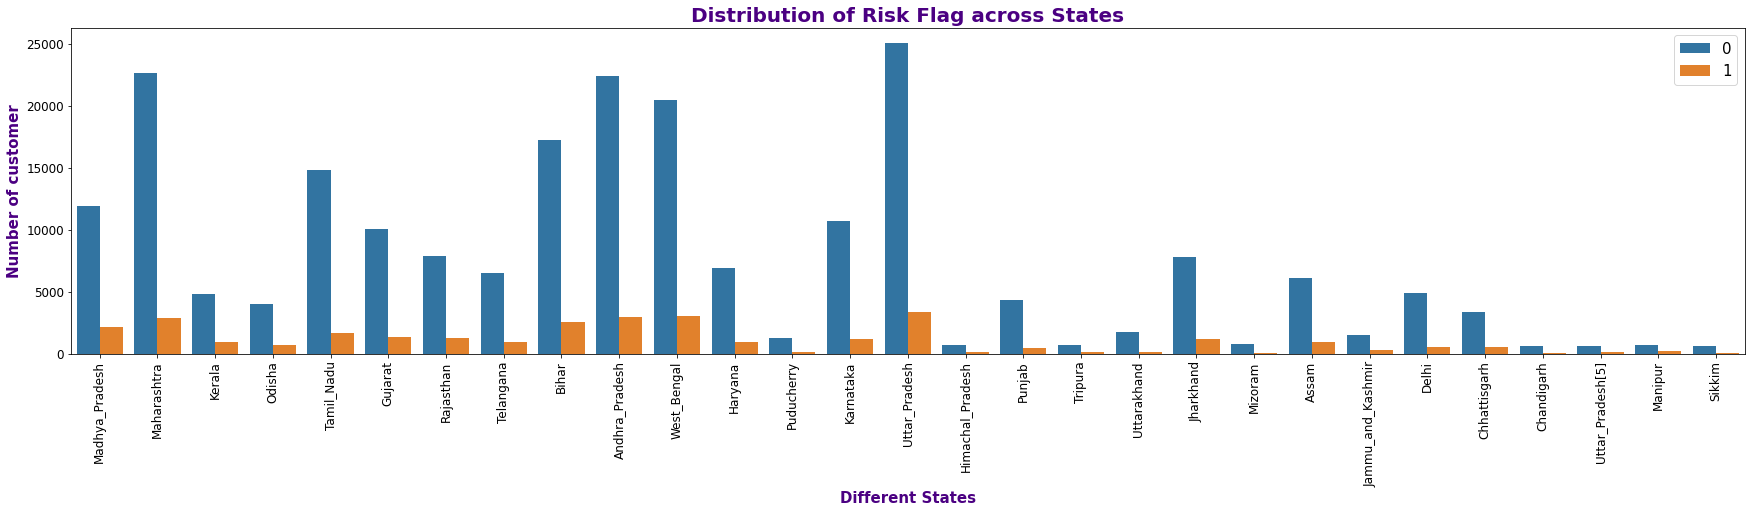

In [18]:
plt.figure(figsize=(30, 6))

sns.countplot(x='STATE' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across States", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Different States", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='indigo')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=90)

plt.show()

### Checking risk flag according to "CURRENT_JOB_YRS"

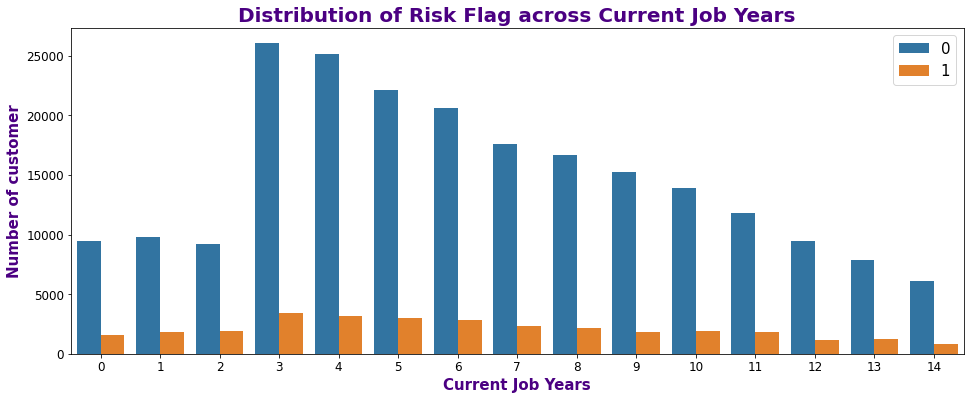


 --Value Counts-- 

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64


In [19]:
plt.figure(figsize=(16, 6))

sns.countplot(x='CURRENT_JOB_YRS' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Current Job Years", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Current Job Years", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='indigo')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print('\n --Value Counts-- \n')
print(train_data['CURRENT_JOB_YRS'].value_counts())

### Checking risk flag according to "CURRENT_HOUSE_YRS"

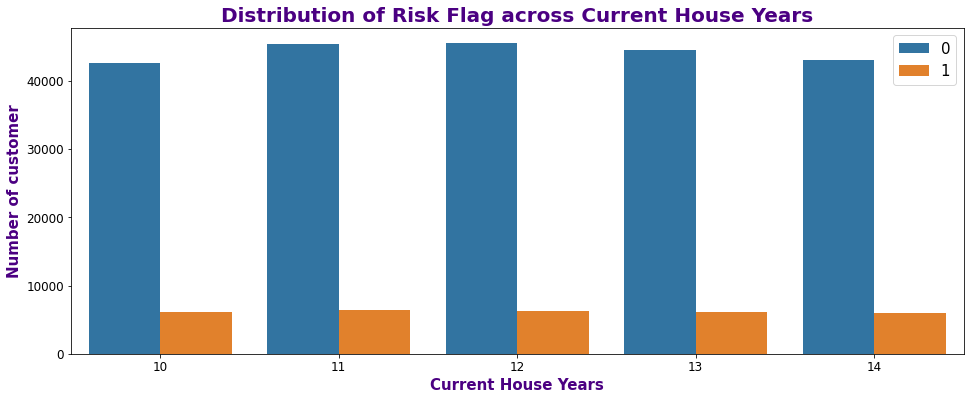


 --Value Counts-- 

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64


In [20]:
plt.figure(figsize=(16, 6))

sns.countplot(x='CURRENT_HOUSE_YRS' , data=train_data, hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Current House Years", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Current House Years", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Number of customer", fontsize = 15, fontweight='bold', color='indigo')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

print('\n --Value Counts-- \n')
print(train_data['CURRENT_HOUSE_YRS'].value_counts())

### Checking distribution of "Experience" using distplot

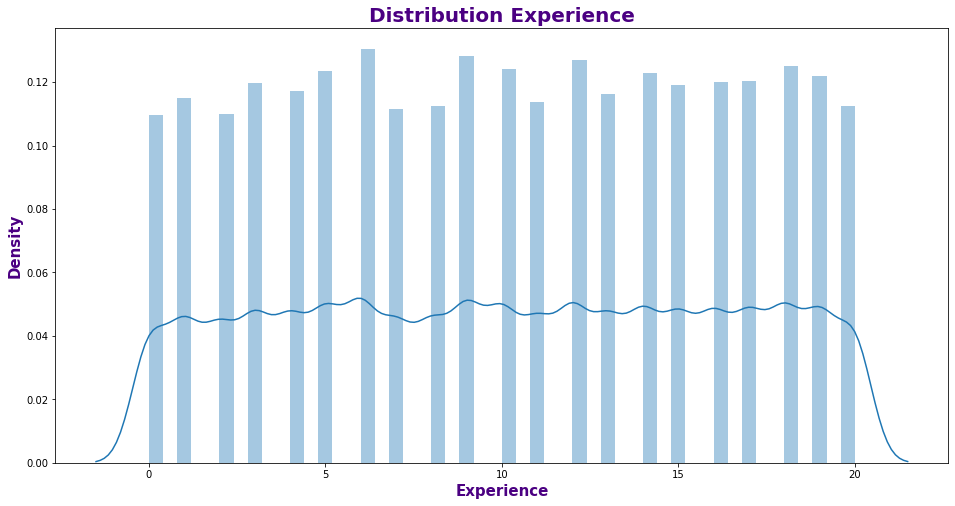

In [21]:
plt.figure(figsize=[16,8])

sns.distplot(train_data['Experience'])

plt.title("Distribution Experience", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Experience", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Density", fontsize = 15, fontweight='bold', color='indigo')

plt.show()

### Checking distribution of "Age" using distplot

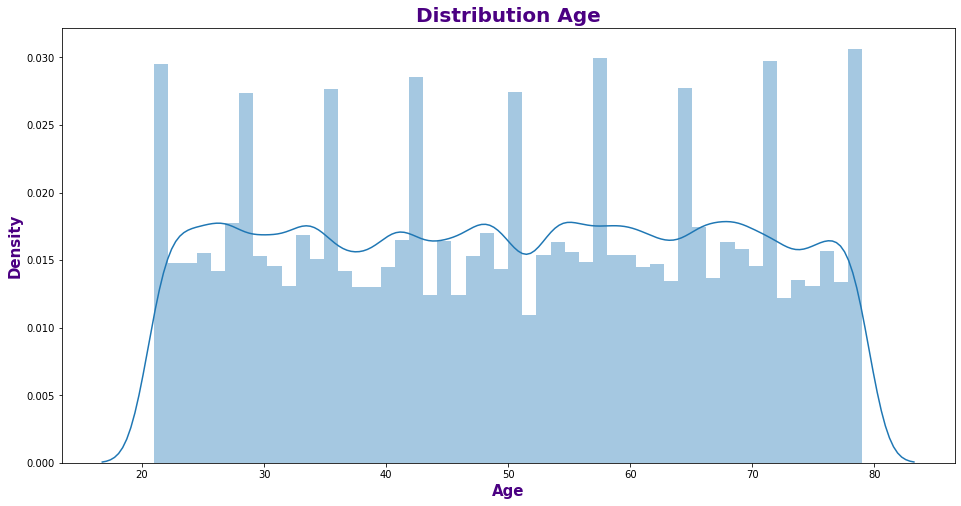

In [22]:
plt.figure(figsize=[16,8])

sns.distplot(train_data['Age'])

plt.title("Distribution Age", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Age", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Density", fontsize = 15, fontweight='bold', color='indigo')

plt.show()

### Checking distribution of "CURRENT_JOB_YRS" using distplot

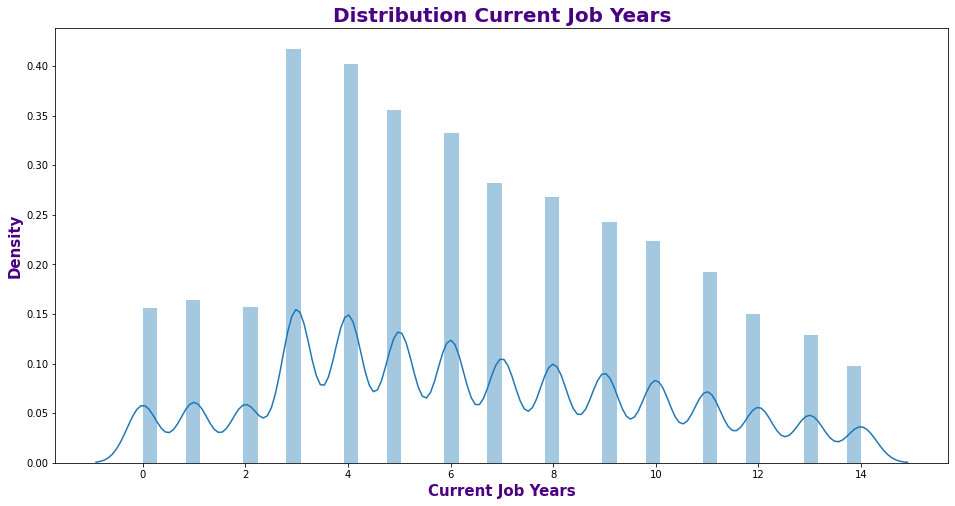

In [23]:
plt.figure(figsize=[16,8])

sns.distplot(train_data['CURRENT_JOB_YRS'])

plt.title("Distribution Current Job Years", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Current Job Years", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Density", fontsize = 15, fontweight='bold', color='indigo')

plt.show()

### Checking distribution of "CURRENT_HOUSE_YRS" using distplot

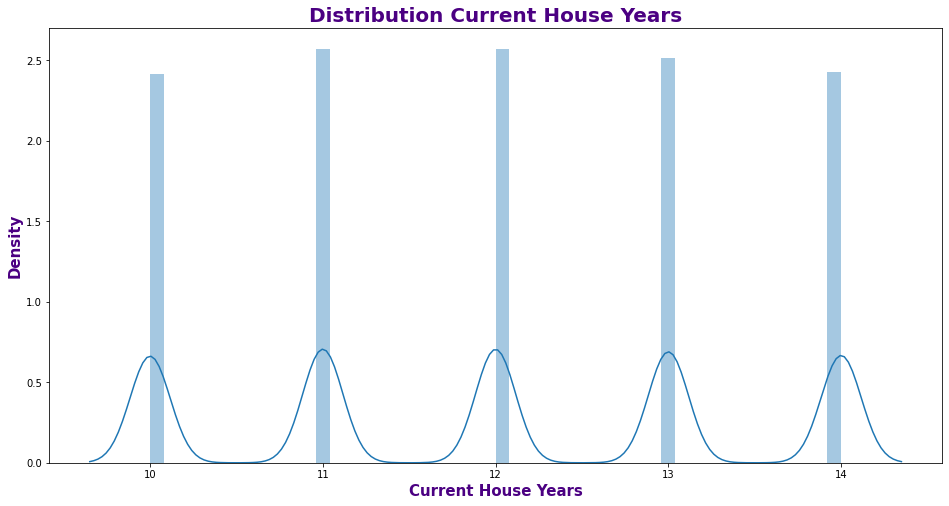

In [24]:
plt.figure(figsize=[16,8])

sns.distplot(train_data['CURRENT_HOUSE_YRS'])

plt.title("Distribution Current House Years", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Current House Years", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Density", fontsize = 15, fontweight='bold', color='indigo')

plt.show()

### Checking distribution of "Income" using distplot

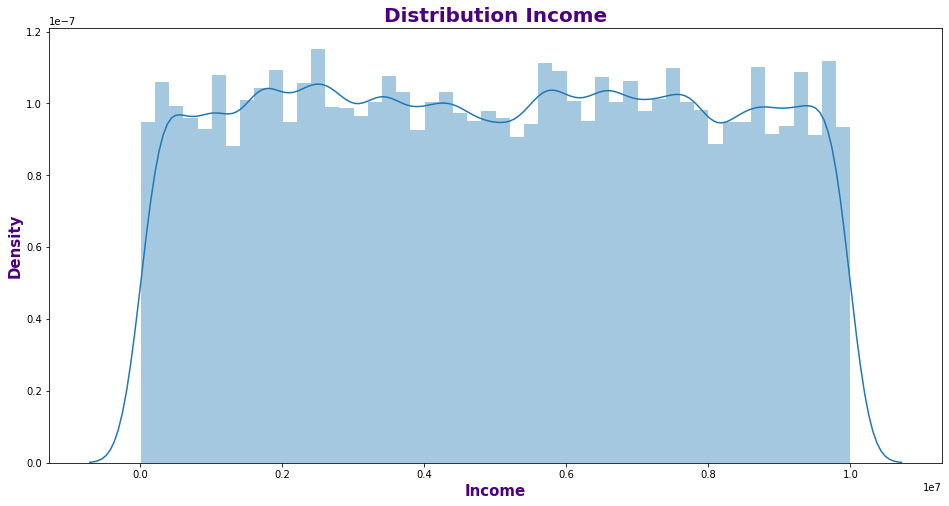

In [25]:
plt.figure(figsize=[16,8])

sns.distplot(train_data['Income'])

plt.title("Distribution Income", fontsize = 20, fontweight='bold', color='indigo')
plt.xlabel("Income", fontsize = 15, fontweight='bold', color='indigo')
plt.ylabel("Density", fontsize = 15, fontweight='bold', color='indigo')

plt.show()

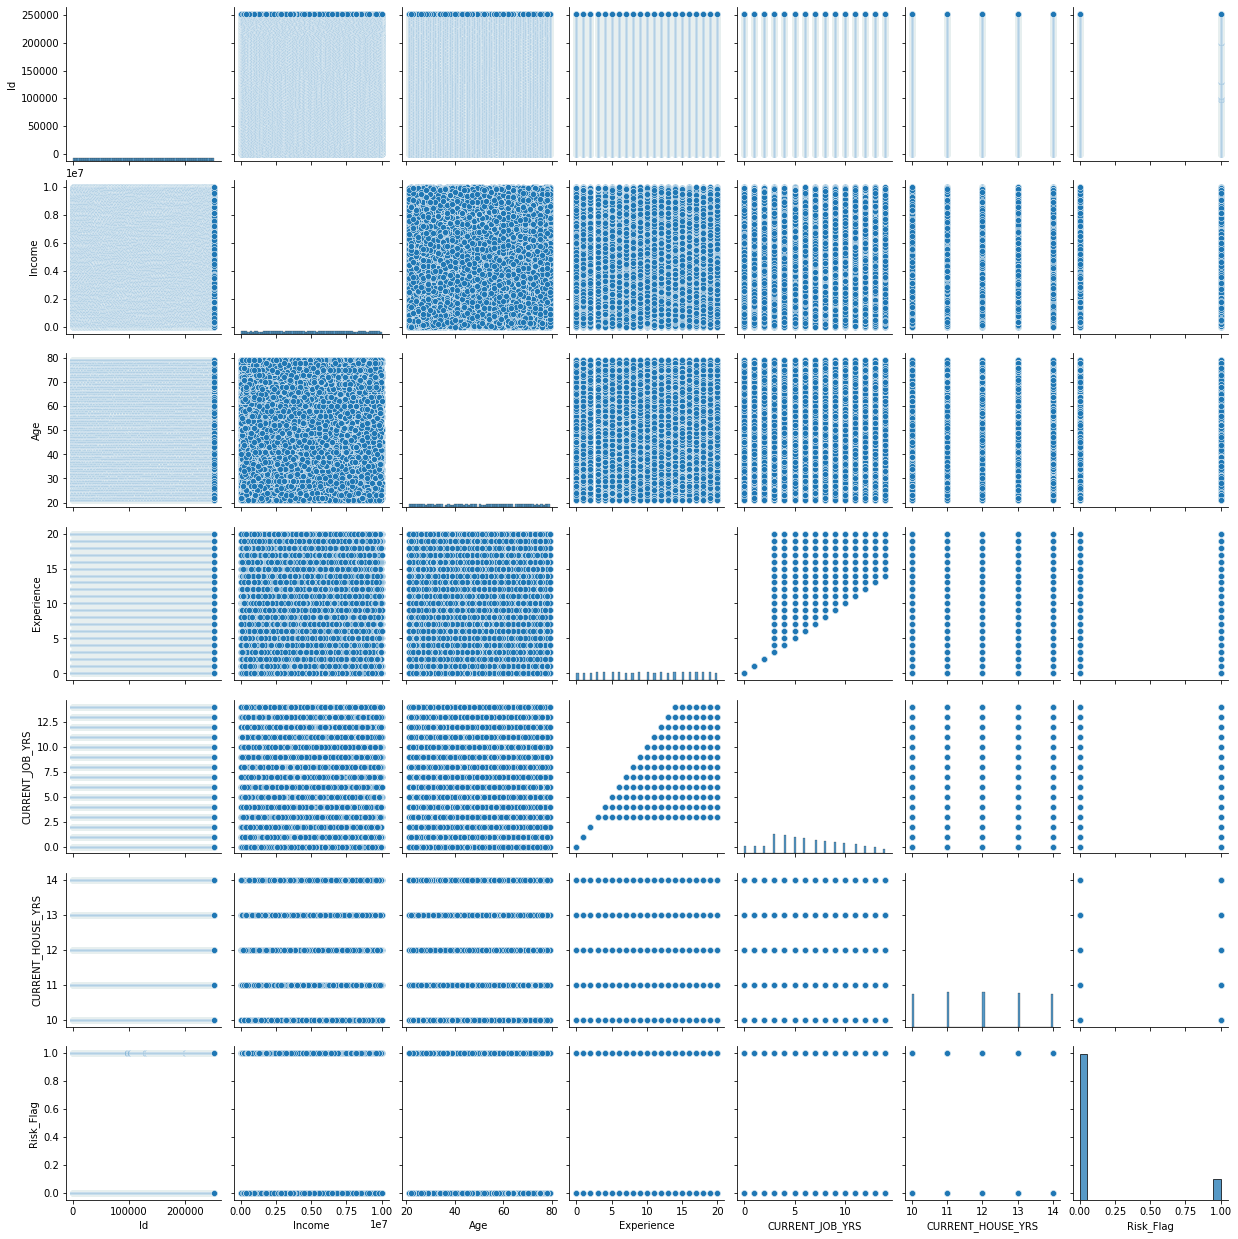

In [26]:
sns.pairplot(train_data)
plt.show()

### Checking correlation between variables

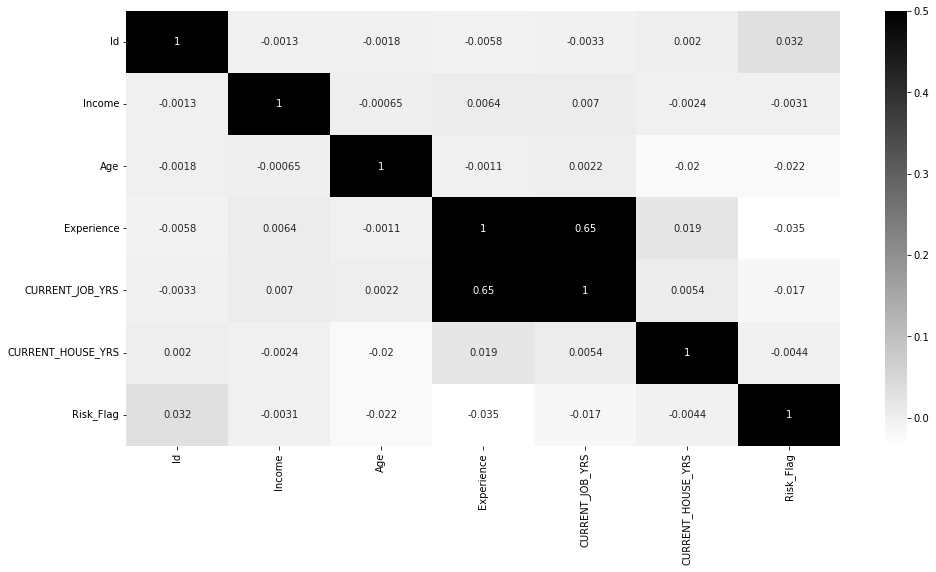

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), annot=True, cmap='binary', vmax=.5)
plt.show()

Insight: As we can see "Experience" and "CURRENT_JOB_YRS" correlate each other. so, we will drop one of them. I will drop "CURRENT_JOB_YRS".

In [28]:
# drop unnecessary columns
cols = ['Id', "CURRENT_JOB_YRS"]
train_data = train_data.drop(columns=cols, axis=1)
train_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,14,1


### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

In [30]:
train_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,13,0
1,7574516,40,10,1,2,0,43,227,14,13,0
2,3991815,66,4,0,2,0,47,8,12,10,0
3,6256451,41,2,1,2,1,43,54,17,12,1
4,5768871,47,11,1,2,0,11,296,22,14,1


### Train-Test Split

In [31]:
# specify input and output attributes
x = train_data.drop(columns=['Risk_Flag'], axis=1)
y = train_data['Risk_Flag']

In [32]:
x

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,13
1,7574516,40,10,1,2,0,43,227,14,13
2,3991815,66,4,0,2,0,47,8,12,10
3,6256451,41,2,1,2,1,43,54,17,12
4,5768871,47,11,1,2,0,11,296,22,14
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,11
251996,2843572,26,10,1,2,0,3,251,13,11
251997,4522448,46,7,1,2,0,17,144,14,12
251998,6507128,45,0,1,2,0,27,233,18,10


In [33]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

### Scaling of features

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)
x_sc

array([[-1.28314486e+00, -1.57960351e+00, -1.18023232e+00, ...,
         1.00716661e+00, -8.63132830e-02,  7.16355856e-01],
       [ 8.95457244e-01, -5.83343640e-01, -1.40667075e-02, ...,
         7.46867306e-01,  2.03843237e-02,  7.16355856e-01],
       [-3.49268601e-01,  9.40347921e-01, -1.01363724e+00, ...,
        -1.62836384e+00, -1.93010890e-01, -1.42798056e+00],
       ...,
       [-1.64912549e-01, -2.31722510e-01, -5.13851972e-01, ...,
        -1.53334452e-01,  2.03843237e-02,  1.57705165e-03],
       [ 5.24618196e-01, -2.90326032e-01, -1.68001759e+00, ...,
         8.11942132e-01,  4.47174751e-01, -1.42798056e+00],
       [ 1.41510816e+00,  1.17476201e+00,  1.15209891e+00, ...,
        -1.43313936e+00,  8.73965177e-01, -7.13201753e-01]])

##### Computing VIF(Variance Inflation Factor) for detecting multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_sc,i) for i in range(x_sc.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.000364,Income
1,1.000732,Age
2,1.001202,Experience
3,1.000898,Married/Single
4,1.001259,House_Ownership
5,1.000994,Car_Ownership
6,1.000644,Profession
7,1.002949,CITY
8,1.002385,STATE
9,1.001027,CURRENT_HOUSE_YRS


•♦: VIF(Variance Inflation Factor) of all features are less than 5 so we consider all features as relavant features for modelling.

## Building Prediction Model using Random Forest Classifier

#### Dividing the Data as 80% for training and 20% for test data

In [36]:
## Creating new variable
X = x_sc
Y = y

## Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.20, random_state=0)

##### Checking shape of train and test data

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(201600, 10)
(201600,)
(50400, 10)
(50400,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#### Model prediction on X_test data

In [39]:
X_test
len(X_test)
## test data : features

50400

In [40]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation Metrics

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

##### Confusion Matrix

In [42]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[42042,  2217],
       [ 2883,  3258]], dtype=int64)

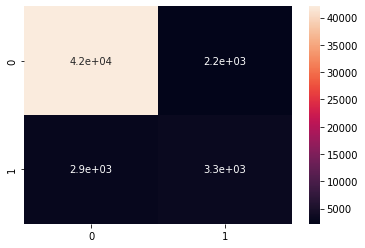

In [43]:
sns.heatmap(conf_mat, annot=True)
plt.show()

##### Accuracy Score

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)

Accuracy score:-  0.8988095238095238


##### Precision

In [45]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
print("Precision score:- ", Precision)

Precision score:-  0.9499084931878262


##### Recall

In [46]:
Recall = true_positive/(true_positive+false_negative)
print("Recall score:- ", Recall)

Recall score:-  0.9358263772954925


##### F1 Score

In [47]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1 score:- ", F1_Score)

F1 score:-  0.9428148546824543


##### ROC/AUC

In [48]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.7402204898767661


##### ROC Curve

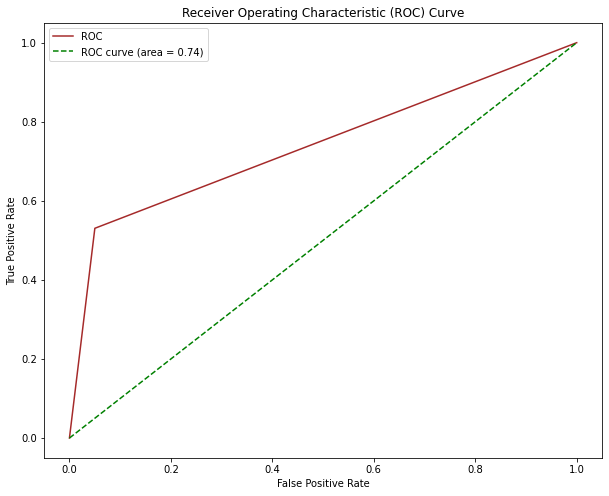

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### K-Fold Cross Validation

In [50]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.89806548 0.89925595 0.89697421 0.89858631 0.90049603]


###### We can summarize the cross-validation accuracy by calculating its mean.

In [51]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.8987


##### MODEL EVALUATION SUMMARY :

                        Model accuracy : 89.88%
                        Precision      : 0.9499
                        Recall         : 0.9358
                        F1 Score       : 0.9428
                        AUC            : 0.7402
                        K-Fold         : 0.8987

## PREDICTIONS ON TEST DATA

##### Importing Test Data

In [52]:
test_data = pd.read_csv('Test.csv')
test_data

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


#### Preparing Test Data for Prediction

In [53]:
# Deleting some columns as we did in training data

test_data.drop(columns=["CURRENT_JOB_YRS"], inplace=True)
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,11


#### Checking Missing Values of Test Data

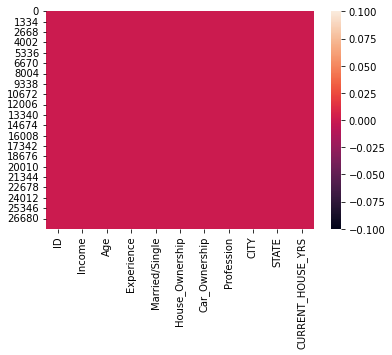

In [54]:
# view of missing values
sns.heatmap(test_data.isnull())
plt.show()

In [55]:
test_data.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_HOUSE_YRS    0
dtype: int64

Insight : there is no missing values.

In [56]:
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,11


#### Label Encoding of Test Data

In [57]:
# from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()

cols1 = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

for col in cols1:
    test_data[col] = le1.fit_transform(test_data[col])

In [58]:
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
0,1,7393090,59,19,1,2,0,26,181,28,13
1,2,1215004,25,5,1,2,0,24,131,14,10
2,3,8901342,50,12,1,2,0,30,290,14,14
3,4,1944421,49,9,0,2,1,1,171,14,12
4,5,13429,25,18,1,2,1,12,39,28,11


In [59]:
t_test = test_data.drop(columns=['ID'])
t_test.shape

(28000, 10)

In [60]:
t_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,181,28,13
1,1215004,25,5,1,2,0,24,131,14,10
2,8901342,50,12,1,2,0,30,290,14,14
3,1944421,49,9,0,2,1,1,171,14,12
4,13429,25,18,1,2,1,12,39,28,11


In [61]:
# Making separate "Id" Column
Id = test_data['ID']
Id

0            1
1            2
2            3
3            4
4            5
         ...  
27995    27996
27996    27997
27997    27998
27998    27999
27999    28000
Name: ID, Length: 28000, dtype: int64

#### Checking shape of Training and Test Data

In [62]:
# training data : features(in scaled form)
X

array([[-1.28314486e+00, -1.57960351e+00, -1.18023232e+00, ...,
         1.00716661e+00, -8.63132830e-02,  7.16355856e-01],
       [ 8.95457244e-01, -5.83343640e-01, -1.40667075e-02, ...,
         7.46867306e-01,  2.03843237e-02,  7.16355856e-01],
       [-3.49268601e-01,  9.40347921e-01, -1.01363724e+00, ...,
        -1.62836384e+00, -1.93010890e-01, -1.42798056e+00],
       ...,
       [-1.64912549e-01, -2.31722510e-01, -5.13851972e-01, ...,
        -1.53334452e-01,  2.03843237e-02,  1.57705165e-03],
       [ 5.24618196e-01, -2.90326032e-01, -1.68001759e+00, ...,
         8.11942132e-01,  4.47174751e-01, -1.42798056e+00],
       [ 1.41510816e+00,  1.17476201e+00,  1.15209891e+00, ...,
        -1.43313936e+00,  8.73965177e-01, -7.13201753e-01]])

In [63]:
# Training data : target variable
Y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [64]:
print(X.shape)  ## X : training data : features
print(Y.shape)  ## Y:  training data : target
print(t_test.shape)  ## test data : features

(252000, 10)
(252000,)
(28000, 10)


## Modelling using Random Forest Classifier Algorithm

In [65]:
#from sklearn.ensemble import RandomForestClassifier

rf_classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier1.fit(X, Y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting the values for Test Data

In [66]:
# scaling of t_test
#from sklearn.preprocessing import StandardScaler

scalar1 = StandardScaler()
t_test_scaled = scalar1.fit_transform(t_test)
t_test_scaled

array([[ 0.8249986 ,  0.5222151 ,  1.47325342, ...,  0.24790532,
         1.51443586,  0.72132307],
       [-1.33148683, -1.46265637, -0.84954617, ..., -0.29442485,
         0.02843121, -1.4250155 ],
       [ 1.35145994, -0.00319206,  0.31185362, ...,  1.43018509,
         0.02843121,  1.43676925],
       ...,
       [ 1.06561022, -1.52103494, -0.84954617, ...,  0.34552475,
         0.02843121,  0.72132307],
       [ 1.55141132,  0.05518652,  0.47776788, ..., -1.20553954,
        -1.03300068,  1.43676925],
       [ 1.47328257, -0.47022064, -0.18588915, ...,  0.58415003,
         0.02843121, -1.4250155 ]])

In [67]:
# finally prediction of Test data

test_pred = rf_classifier1.predict(t_test_scaled)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Making Dataframe which contains "Id" and prediction "Risk_Flag" of Test Data

In [68]:
data_frame = {'Customer Id': Id, 'Risk_Flag': test_pred} 
     
prediction_df = pd.DataFrame(data_frame)
prediction_df

,Customer Id,Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


### Saving the dataframe to "Loan_default_predicted_jagadish.csv" file

In [69]:
prediction_df.to_csv("Loan_default_predicted_jagadish.csv")

                                                            •••♦♦♦•••